# Initial EDA of the data

## Import the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## EDA on transactions data

In [4]:
# DATA_PATH = r'C:\Users\Saleh\Desktop\kkbox-churn-prediction-challenge'
DATA_PATH = r'C:\Users\Olabola\Desktop\kkbox-churn-prediction-challenge'

In [5]:
members_df = pd.read_csv(os.path.join(DATA_PATH, 'members_v3.csv', 'members_v3.csv'))
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [9]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [10]:
members_df.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [6]:
members_df.msno.nunique()

6769473

In [11]:
members_df.isna().sum()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

### Distribution of features in members data

### Distribution of cities

<AxesSubplot:xlabel='city', ylabel='count'>

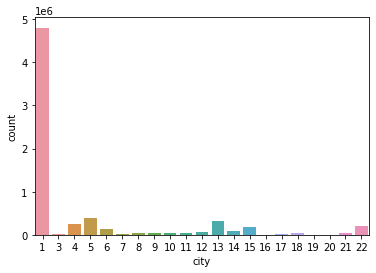

In [21]:
sns.countplot(data=members_df, x='city')

In [13]:
members_df.city.value_counts()

1     4804326
5      385069
13     320978
4      246848
22     210407
15     190213
6      135200
14      89940
12      66843
9       47639
11      47489
8       45975
18      38039
10      32482
21      30837
17      27772
3       27282
7       11610
16       5092
20       4233
19       1199
Name: city, dtype: int64

### Distribution of gender

Most users elected not to enter their gender information

In [19]:
# 65% of users did not enter gender information
members_df.gender.isna().sum() / len(members_df)

0.6543352783887313

Here we will count the percentage of males and females

In [28]:
no_males = members_df[members_df.gender=='male'].gender.count()
no_females = members_df[members_df.gender=='female'].gender.count()

percentage_males = no_males / members_df.gender.count()
percentage_females = no_females / members_df.gender.count()

print(f"Percentage of\nmales: {percentage_males}\nfemales: {percentage_females}")


Percentage of
males: 0.5108424559652098
females: 0.4891575440347902


<AxesSubplot:xlabel='gender', ylabel='count'>

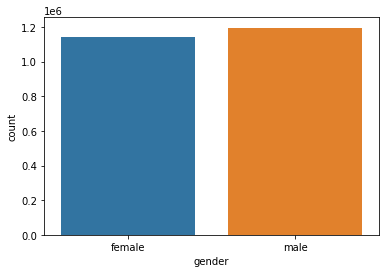

In [22]:
sns.countplot(data=members_df, x='gender')

### Distribution of registration type

<AxesSubplot:xlabel='registered_via', ylabel='count'>

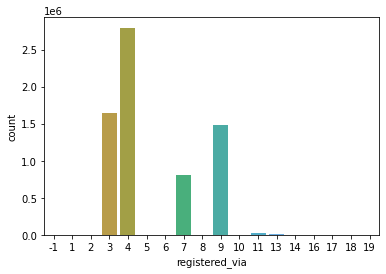

In [29]:
sns.countplot(data=members_df, x='registered_via')

### Age distribution

In [39]:
members_df[(members_df.bd > 0) & (members_df.bd < 15)].bd.value_counts()

14    5632
13     790
12     199
6      170
7      148
5      122
8      113
4      108
11     106
10      97
9       81
1       67
3       53
2       37
Name: bd, dtype: int64

<AxesSubplot:xlabel='bd', ylabel='Count'>

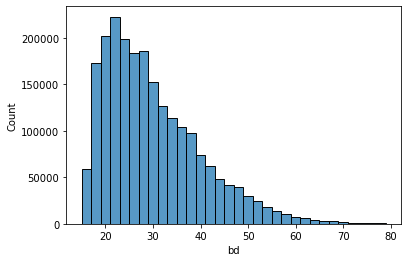

In [47]:
sns.histplot(data=members_df[(members_df.bd > 14) & (members_df.bd < 80)], x='bd', binwidth=2)

### Distribution of registration_init_time

In [73]:
date_str_df = pd.DataFrame(members_df.registration_init_time.astype(str))
# Convert registration_init_time column to datetime format 
date_str_df.registration_init_time = pd.to_datetime(date_str_df.registration_init_time, format='%Y%m%d')
date_str_df['month'] = date_str_df.registration_init_time.dt.month
date_str_df['day'] = date_str_df.registration_init_time.dt.day_of_week
date_str_df.head()

,registration_init_time,month,day
0,2011-09-11,9,6
1,2011-09-14,9,2
2,2011-09-15,9,3
3,2011-09-15,9,3
4,2011-09-15,9,3


<AxesSubplot:xlabel='month', ylabel='count'>

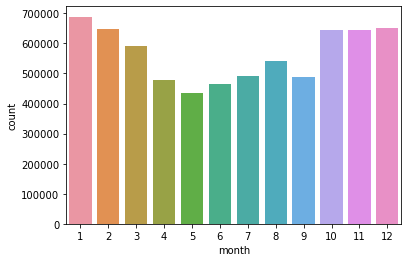

In [71]:
sns.countplot(data=date_str_df, x='month')

<AxesSubplot:xlabel='day', ylabel='count'>

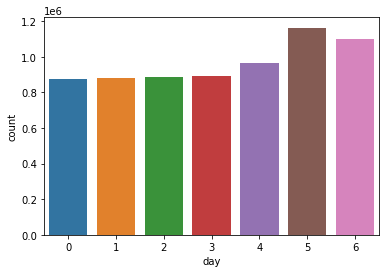

In [74]:
sns.countplot(data=date_str_df, x='day')